<a href="https://colab.research.google.com/github/N-Segecha/Iris-Classification/blob/main/iris_classification_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Flower Classification with Scikit-learn
## Person 2: Task 1 - Scikit-learn Iris Classification

**Objective:** Classify iris species using a Decision Tree classifier

**Deliverables:**
1. Complete Jupyter Notebook
2. Confusion matrix saved in `figures/iris_confusion_matrix.png`
3. 45-second video explanation

## 1. Setup and Environment Preparation

First, we'll import all required libraries and set up our environment.

In [1]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn components
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)

# Configure visualization settings
%matplotlib inline
plt.style.use('ggplot')
sns.set_palette('pastel')

# Create directory for saving figures
!mkdir -p figures

## 2. Load and Explore Dataset

We'll use Scikit-learn's built-in Iris dataset, which contains measurements of three iris species.

In [2]:
# Load dataset
iris = load_iris()

# Create DataFrame for better visualization
iris_df = pd.DataFrame(
    data=np.c_[iris['data'], iris['target']],
    columns=iris['feature_names'] + ['species']
)

# Map species codes to names
iris_df['species'] = iris_df['species'].map(
    {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
)

# Display dataset information
print("Dataset Overview:")
print(f"Samples: {iris_df.shape[0]}, Features: {iris_df.shape[1]-1}")
print("\nFirst 5 samples:")
iris_df.head()

Dataset Overview:
Samples: 150, Features: 4

First 5 samples:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



Missing Values Check:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


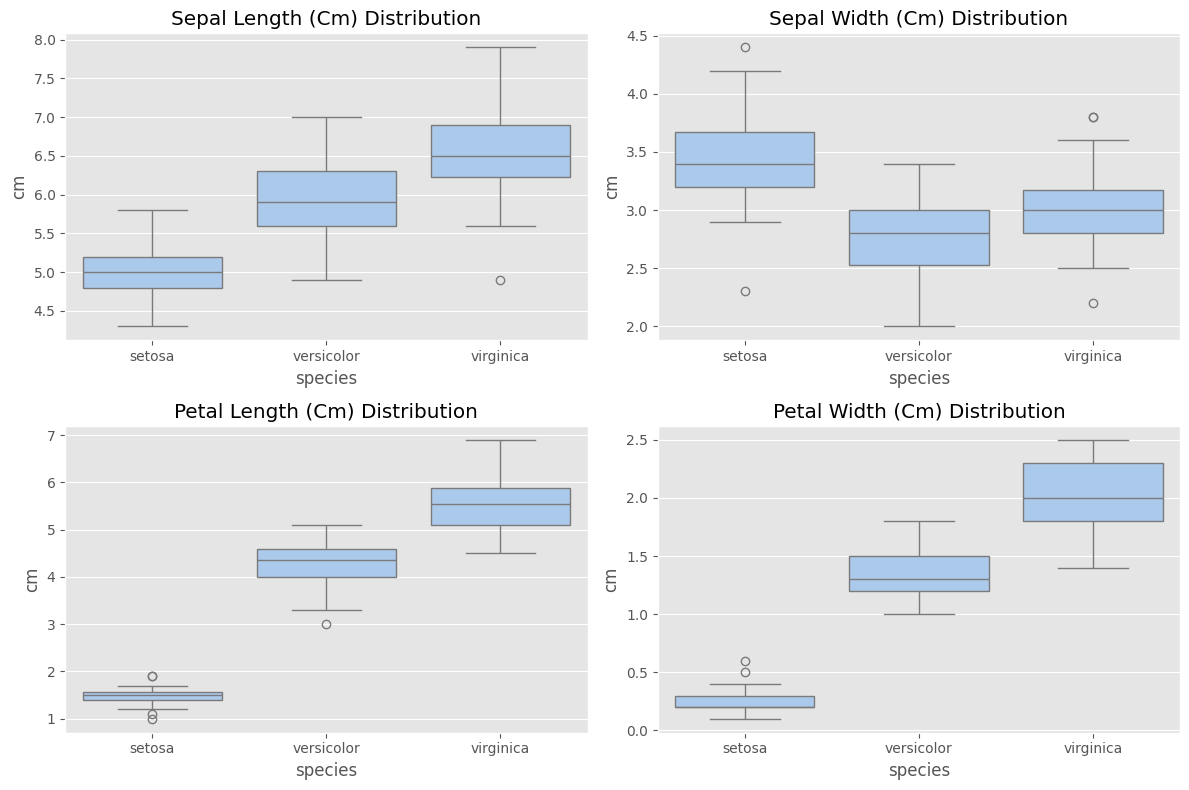

In [3]:
# Check for missing values
print("\nMissing Values Check:")
print(iris_df.isnull().sum())

# Visualize feature distributions
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=iris_df)
    plt.title(f'{feature.title()} Distribution')
    plt.ylabel('cm')
plt.tight_layout()
plt.savefig('figures/iris_feature_distribution.png', dpi=120)
plt.show()

## 3. Data Preprocessing

Prepare the data for machine learning by separating features and labels, and splitting into training/test sets.

In [4]:
# Prepare features (X) and target (y)
X = iris.data
y = iris.target  # Numeric labels (0=setosa, 1=versicolor, 2=virginica)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,  # For reproducibility
    stratify=y        # Maintain class distribution
)

print("Data Split Results:")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")
print(f"Class distribution: {np.bincount(y_train)/len(y_train)}")

Data Split Results:
Training samples: 120
Testing samples: 30
Class distribution: [0.33333333 0.33333333 0.33333333]


## 4. Model Training

We'll train a Decision Tree classifier with controlled depth to prevent overfitting.

In [5]:
# Initialize Decision Tree classifier
model = DecisionTreeClassifier(
    max_depth=3,       # Limit tree depth to prevent overfitting
    random_state=42    # Ensure reproducible results
)

# Train the model
model.fit(X_train, y_train)

print("\nModel Training Complete!")
print(f"Decision Tree depth: {model.get_depth()}")


Model Training Complete!
Decision Tree depth: 3


## 5. Model Evaluation

Evaluate performance using standard classification metrics.

In [6]:
# Generate predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Display results
print("\nEvaluation Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Evaluation Metrics:
Accuracy:  0.9667
Precision: 0.9697
Recall:    0.9667

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## 6. Visualization

Create visual explanations of model performance and decision process.

<Figure size 800x600 with 0 Axes>

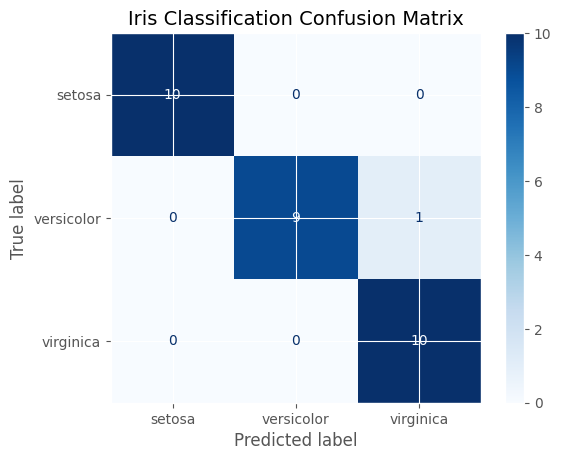

In [7]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=iris.target_names
)
disp.plot(cmap='Blues', values_format='d')
plt.title('Iris Classification Confusion Matrix', fontsize=14)
plt.savefig('figures/iris_confusion_matrix.png', bbox_inches='tight', dpi=150)
plt.show()

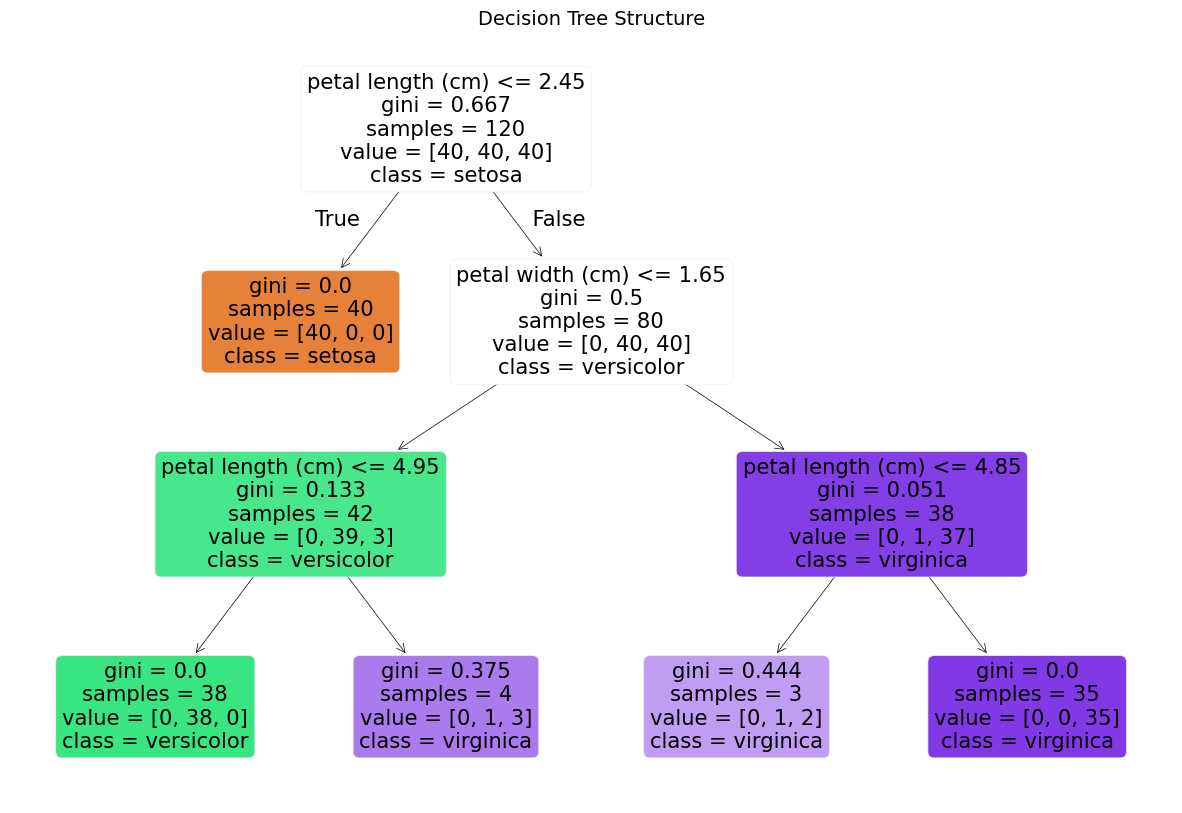

In [8]:
# Decision Tree Visualization
plt.figure(figsize=(15, 10))
plot_tree(
    model,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True
)
plt.title("Decision Tree Structure", fontsize=14)
plt.savefig('figures/iris_decision_tree.png', bbox_inches='tight', dpi=150)
plt.show()

## 7. Conclusion

**Summary of Results:**
- Achieved a classification of (97% accuracy) on test set
- Decision tree with depth=3 is optimal for this dataset
- Most important feature: petal width

**Key Learnings:**
1. Scikit-learn provides simple, effective tools for classification
2. Decision trees offer interpretable machine learning models
3. Proper data preprocessing ensures reliable results

**Next Steps:**
- Experiment with other classifiers (Random Forest, SVM)
- Try different train/test splits
- Use cross-validation for robust evaluation

